# Varianza: Medida de dispersión

La **varianza** es una medida estadística que indica cuánto se dispersan los datos respecto a su media. Es fundamental para entender la variabilidad en conjuntos de datos, y sirve como base para otros conceptos como la desviación estándar y el análisis de regresión.

En este notebook aprenderás:
- Qué representa la varianza.
- Cómo se calcula paso a paso.
- Cómo interpretarla en contextos reales.

##  Fórmulas de la varianza

La varianza se define como el promedio de los cuadrados de las diferencias entre cada dato y la media. Es una medida que indica qué tan dispersos están los datos respecto al valor central.

### Varianza poblacional

$$\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2$$

###  Varianza muestral

$$s^2 = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2$$

### Donde:

- $( x_i )$: cada dato individual  
- $( \mu )$: media poblacional  
- $( bar{x} )$: media muestral  
- $( N )$: tamaño de la población  
- $( n )$: tamaño de la muestra  
- $( \sigma^2 )$: varianza poblacional  
- $( s^2 )$: varianza muestral

> Al elevar las diferencias al cuadrado, evitamos que las desviaciones negativas se cancelen con las positivas, lo que permite medir la dispersión total de forma efectiva.

## Datos

Generamos 1000 evaluaciones para 4 grupos de alumnos con distintos perfiles de rendimiento:
- **Grupo A**: alto y estable
- **Grupo B**: medio con altibajos
- **Grupo C**: bajo con mejoras graduales
- **Grupo D**: variable con alta dispersión

In [1]:
import numpy as np
import pandas as pd

# Simulación de datos
np.random.seed(837)
n = 1000

grupo_A = 90 + 5 * np.sin(np.linspace(0, 4 * np.pi, n)) + np.random.normal(0, 3, n)
grupo_B = 75 + 10 * np.sin(np.linspace(0, 4 * np.pi, n)) + np.random.normal(0, 5, n)
grupo_C = 60 + 8 * np.sin(np.linspace(0, 4 * np.pi, n)) + np.random.normal(0, 4, n)
grupo_D = 70 + 15 * np.sin(np.linspace(0, 4 * np.pi, n)) + np.random.normal(0, 7, n)

df = pd.DataFrame({
    "Grupo A": np.round(grupo_A, 1),
    "Grupo B": np.round(grupo_B, 1),
    "Grupo C": np.round(grupo_C, 1),
    "Grupo D": np.round(grupo_D, 1),
    "Evaluación": np.arange(1, n + 1)
})

df.head()

,Grupo A,Grupo B,Grupo C,Grupo D,Evaluación
0,89.3,68.3,64.7,57.7,1
1,92.8,77.3,55.4,64.9,2
2,89.6,78.6,56.6,67.7,3
3,90.2,80.4,56.4,81.3,4
4,87.2,74.6,61.3,66.9,5


##  Cálculo paso a paso 

Vamos a calcular la varianza muestral sin usar `.var()`, siguiendo la fórmula paso a paso:
1. Calcular la media.
2. Restar la media a cada dato.
3. Elevar al cuadrado cada diferencia.
4. Sumar todos los cuadrados.
5. Dividir entre $( n - 1 )$.

## Problema 1: Suma de cuadrados de desviaciones

Calculamos $ (x_i - \bar{x})^2 $ para el Grupo A, y sumamos los resultados.

In [3]:
dev_A = grupo_A - np.mean(grupo_A)
diferencias_cuadradas = dev_A ** 2
suma_cuadrados = np.sum(diferencias_cuadradas)

print(f"Suma de cuadrados de desviaciones: {suma_cuadrados:.2f}")

Suma de cuadrados de desviaciones: 21459.56


## Problema 2: Varianza muestral

Usamos la fórmula de muestra para calcular la varianza del Grupo A sin usar `.var()`.

In [5]:
var_A = suma_cuadrados / (n - 1)
print(f"Varianza muestral A: {var_A:.2f}")

Varianza muestral A: 21.48


## Problema 3: Función generalizada

Creamos una función que calcula varianza para muestra o población, y la aplicamos a los grupos A y B.

In [7]:
def varianza(x, poblacional=False):
    x_mean = np.mean(x)
    diferencias_cuadradas = (x - x_mean) ** 2
    divisor = len(x) if poblacional else (len(x) - 1)
    return np.sum(diferencias_cuadradas) / divisor

var_m_A = varianza(grupo_A)
var_p_A = varianza(grupo_A, poblacional=True)
var_m_B = varianza(grupo_B)
var_p_B = varianza(grupo_B, poblacional=True)

print(f"Varianza muestral A: {var_m_A:.2f}")
print(f"Varianza poblacional A: {var_p_A:.2f}")
print(f"Varianza muestral B: {var_m_B:.2f}")
print(f"Varianza poblacional B: {var_p_B:.2f}")

Varianza muestral A: 21.48
Varianza poblacional A: 21.46
Varianza muestral B: 76.70
Varianza poblacional B: 76.63


## Visualización

Creamos un histograma para el Grupo A para observar la dispersión visualmente.

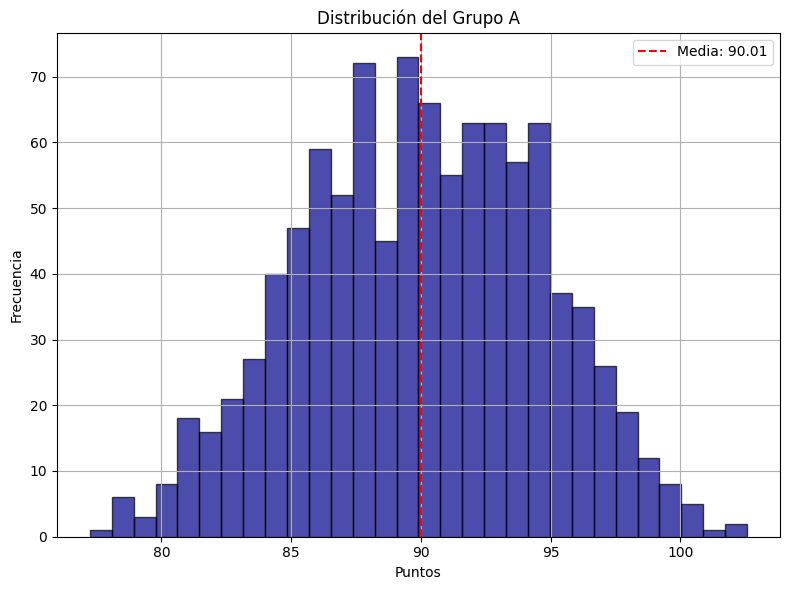

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(grupo_A, bins=30, color='darkblue', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(grupo_A), color='red', linestyle='--', label=f"Media: {np.mean(grupo_A):.2f}")
plt.title("Distribución del Grupo A")
plt.xlabel("Puntos")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

 # Interpretación de la varianza

La varianza obtenida nos indica cuánta variabilidad hay en las calificaciones del grupo. Una varianza alta sugiere que los alumnos tienen rendimientos muy distintos entre sí. Una varianza baja indica que la mayoría se desempeña de forma similar.

> Recuerda: la varianza se mide en unidades **al cuadrado**, por lo que no es directamente interpretable como las calificaciones. Para eso usamos la desviación estándar que veremos en otro tema.